In [1]:
!pip install spacy
!python -m spacy download en_core_web_md
!python -m spacy download pl_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 322.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 MB 258.7 MB/s eta 0:00:0000:01
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_md')


In [2]:
import spacy

# load models
nlp_en = spacy.load("en_core_web_md")
nlp_pl = spacy.load("pl_core_news_md")

# load text files
with open("doyle-znak-czterech.txt", "r", encoding="utf-8") as f:
    pl_text = f.read()
with open("the_sign_of_the_four.txt", "r", encoding="utf-8") as f:
    en_text = f.read()

#remove end token
pl_text = pl_text.replace("\n", " ")
en_text = en_text.replace("\n", " ")

# process
doc_pl = nlp_pl(pl_text)
doc_en = nlp_en(en_text)

print(f"Polish tokens: {len(doc_pl)}, English tokens: {len(doc_en)}")

for sentence in list(doc_pl.sents)[:10]:
    print("-", sentence.text.strip())

for sentence in list(doc_en.sents)[:10]:
    print("-", sentence.text.strip())

Polish tokens: 39653, English tokens: 56794
- Arthur Conan Doyle  Znak czterech tłum.
- Wacław Widigier  ISBN 978-83-288-7054-3     I.
- Umiejętność dedukcji  Sherlock Holmes zdjął z rogu kominka flaszeczkę, po czym z safianowego futerału wyjął strzykawkę.
- Długimi, białymi, nerwowymi palcami osadził cienką igłę i zakasał lewy mankiet koszuli.
- Wzrok jego na chwilę spoczął w zadumie na żylastym przedramieniu pocętkowanym licznymi ukłuciami.
- W końcu wbił igłę w ciało, nacisnął tłok strzykawki i z głębokim westchnieniem zadowolenia z powrotem opadł na wyściełany aksamitem fotel.
- Od wielu miesięcy trzy razy dziennie byłem świadkiem tego zabiegu, ale nigdy nie mogłem się z nim pogodzić.
- Przeciwnie, z każdym dniem widok ten drażnił mnie coraz bardziej, a sumienie wyrzucało mi brak odwagi przeciwdziałania.
- Codziennie niemal obiecywałem sobie nie dopuścić więcej do czegoś podobnego, ale chłodne, swobodne obejście przyjaciela miało w sobie coś nieokreślonego, co nie pozwalało na zbyt

In [3]:
from collections import Counter

def get_nouns(doc):
    return [token.lemma_ for token in doc if token.pos_ == "NOUN"]

pl_nouns = get_nouns(doc_pl)
en_nouns = get_nouns(doc_en)

print("Top 10 Polish nouns:", Counter(pl_nouns).most_common(10))
print("Top 10 English nouns:", Counter(en_nouns).most_common(10))

Top 10 Polish nouns: [('pan', 238), ('człowiek', 104), ('sprawa', 89), ('skarb', 86), ('pani', 80), ('chwila', 63), ('czas', 53), ('ręka', 50), ('noga', 48), ('raz', 47)]
Top 10 English nouns: [('man', 175), ('work', 110), ('hand', 86), ('night', 81), ('time', 78), ('treasure', 75), ('way', 70), ('day', 57), ('case', 56), ('room', 52)]


In [10]:
verb_subj = []
for token in doc_en:
    if token.pos_ == "VERB":
        for child in token.children:
            if child.dep_ == "nsubj":
                verb_subj.append((token.lemma_, child.lemma_))
print (verb_subj[:5])

[('copy', 'you'), ('have', 'you'), ('start', 'Language'), ('give', 'Holmes'), ('take', 'Holmes')]


In [11]:
verb_subj_pl = []
for token in doc_pl:
    if token.pos_ == "VERB":
        for child in token.children:
            if child.dep_ == "nsubj":
                verb_subj_pl.append((token.lemma_, child.lemma_))
print (verb_subj[:5])

[('copy', 'you'), ('have', 'you'), ('start', 'Language'), ('give', 'Holmes'), ('take', 'Holmes')]


In [12]:
verb_obj = []
for token in doc_en:
    if token.pos_ == "VERB":
        for child in token.children:
            if child.dep_ == "dobj":
                verb_obj.append((token.lemma_, child.lemma_))
print (verb_obj[:5])

[('copy', 'it'), ('give', 'it'), ('use', 'it'), ('check', 'law'), ('use', 'eBook')]


In [13]:
verb_obj_pl = []
for token in doc_pl:
    if token.pos_ == "VERB":
        for child in token.children:
            if child.dep_ == "obj":
                verb_obj_pl.append((token.lemma_, child.lemma_))
print (verb_obj[:5])

[('copy', 'it'), ('give', 'it'), ('use', 'it'), ('check', 'law'), ('use', 'eBook')]


In [14]:
# ...Most...
# freq transitive verbs
transitive_verbs = [verb for verb, obj in verb_obj]
print("Five most frequent transitive verbs:", Counter(transitive_verbs).most_common(5), "\n")

# common subjects of say
say_subjects = [subj for verb, subj in verb_subj if verb == "say"]
print("Ten most common subjects of say:", Counter(say_subjects).most_common(10), "\n")

# actions Holmes performs
h_actions = [verb for verb, subj in verb_subj if subj == "Holmes"]
print("Ten actions does the main protagonist ('Holmes') perform the most", Counter(h_actions).most_common(10), "\n")

# actions done to Holmes
h_undergoes = [verb for verb, obj in verb_obj if obj == "Holmes"]
print("Ten actions does the main protagonist ('Holmes') undergo the most:", Counter(h_undergoes).most_common(10), "\n")

# what detectives do
detective_actions = [verb for verb, subj in verb_subj if "Jones" in subj]
print("Jones' actions:", Counter(detective_actions).most_common(5), "\n")

# What happens to detectives
detective_undergoes = [verb for verb, obj in verb_obj if "detective" in obj]
print("Actions on detectives:", Counter(detective_undergoes).most_common(5), "\n")

Five most frequent transitive verbs: [('have', 224), ('take', 97), ('see', 76), ('give', 66), ('make', 65)] 

Ten most common subjects of say: [('he', 77), ('Holmes', 44), ('I', 37), ('she', 14), ('you', 13), ('Jones', 10), ('i.', 5), ('Sholto', 5), ('be', 5), ('companion', 4)] 

Ten actions does the main protagonist ('Holmes') perform the most [('say', 44), ('take', 3), ('sit', 3), ('give', 2), ('return', 2), ('glance', 2), ('look', 2), ('smile', 2), ('place', 1), ('rub', 1)] 

Ten actions does the main protagonist ('Holmes') undergo the most: [('ask', 3), ('remark', 2), ('cry', 2), ('growl', 1), ('exclaim', 1)] 

Jones' actions: [('say', 10), ('get', 2), ('go', 1), ('fix', 1), ('happen', 1)] 

Actions on detectives: [('snap', 1)] 



In [15]:
def detect_voice_en(doc):
    voice_info = []
    for token in doc:
        if token.pos_ == "VERB":
            voice = "active"
            for child in token.children:
                if child.pos_ == "AUX" and child.lemma_ == "be" and token.tag_ == "VBN":
                    voice = "passive"
                    break
            voice_info.append(("eng", token.idx, token.lemma_, voice))
    return voice_info

en_voice = detect_voice_en(doc_en)

print(en_voice[:5])

[('eng', 221, 'copy', 'active'), ('eng', 230, 'give', 'active'), ('eng', 246, 're', 'active'), ('eng', 248, '-', 'active'), ('eng', 249, 'use', 'active')]


In [18]:
def detect_voice_pl(doc):
    voice_info = []
    for token in doc:
        if token.pos_ == "VERB":
            voice = "active"
            for aux in token.children:
                if aux.pos_ == "AUX" and aux.lemma_ in {"być", "zostać"}:
                    voice = "passive"
                    break
            for child in token.children:
                if child.text.lower() == "się" and child.dep_ == "expl":
                    voice = "passive"
                    break
            voice_info.append(("pl", token.idx, token.lemma_, voice))
    return voice_info

pl_voice = detect_voice_pl(doc_pl)

print(pl_voice[:5])

[('pl', 125, 'zdjąć', 'active'), ('pl', 189, 'wyjąć', 'active'), ('pl', 243, 'osadzić', 'active'), ('pl', 265, 'zakasać', 'active'), ('pl', 316, 'spocząć', 'active')]


In [19]:
import pandas as pd

df = pd.DataFrame(en_voice + pl_voice, columns=["Language", "Position", "Lemma", "Voice"])
print(df.groupby(["Language", "Voice"]).size())

Language  Voice  
eng       active     5675
          passive     374
pl        active     5425
          passive      89
dtype: int64


In [20]:
print(df.groupby(["Language", "Lemma"]).size().sort_values(ascending=False).head(10))

Language  Lemma
eng       say      268
          have     257
pl        mieć     231
eng       see      149
pl        móc      149
eng       be       142
          come     138
          know     121
pl        być      117
          rzec     110
dtype: int64


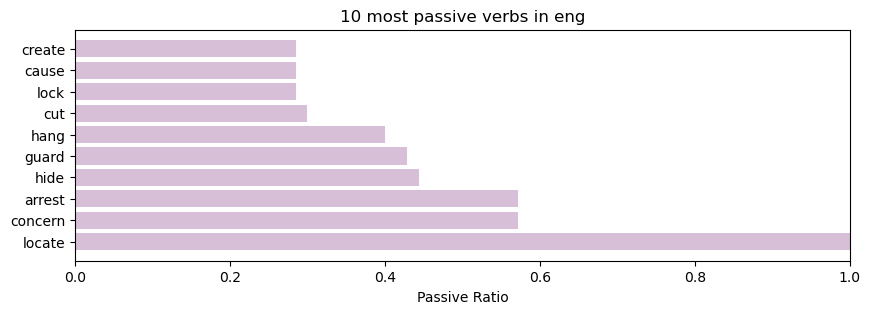

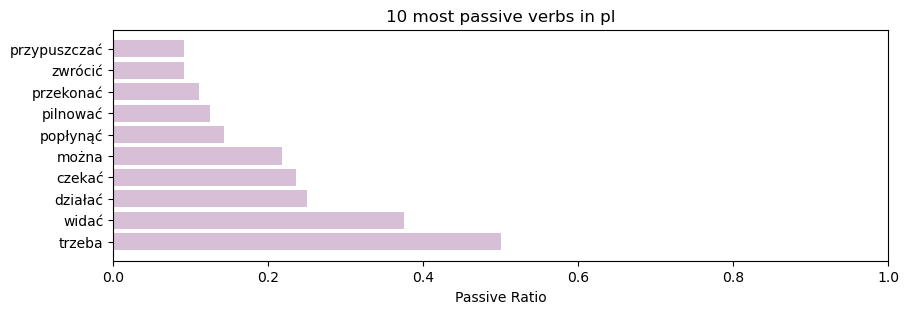

In [22]:
import matplotlib.pyplot as plt

# passive ratio per lemma
passive_ratio = df.groupby(["Language", "Lemma"])["Voice"].apply(
    lambda x: (x == "passive").mean() ).reset_index(name="PassiveRatio")

# total occurrences of each lemma
lemma_counts = df.groupby(["Language", "Lemma"]).size().reset_index(name="Count")

# okay, so this line filters rare pairs that would have 1 ratio because they appear only once/twice
frequent_lemmas = lemma_counts[lemma_counts["Count"] >= 7]
# 7 was threshold where last 1.0 ratio word disappeared- indict
# it is possible that in the context of the novel it was used only this way, as in the legal context
# but I removed it as statistical outliner
passive_ratio = passive_ratio.merge(frequent_lemmas, on=["Language", "Lemma"])

# plot
for lang in ["eng", "pl"]:
    top10 = passive_ratio[passive_ratio["Language"] == lang] \
        .sort_values("PassiveRatio", ascending=False) \
        .head(10)

    plt.figure(figsize=(10, 3))
    plt.barh(top10["Lemma"], top10["PassiveRatio"], color="thistle")
    plt.xlabel("Passive Ratio")
    plt.title(f"10 most passive verbs in {lang}")
    plt.xlim(0, 1)
    plt.show()
